# VINAY KUMAR
# 214102315
# Assignment 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scipy
from scipy.integrate import quad
from math import sin, cos, exp, pi
from mpmath import nsum
import warnings;
warnings.simplefilter('ignore')
import time

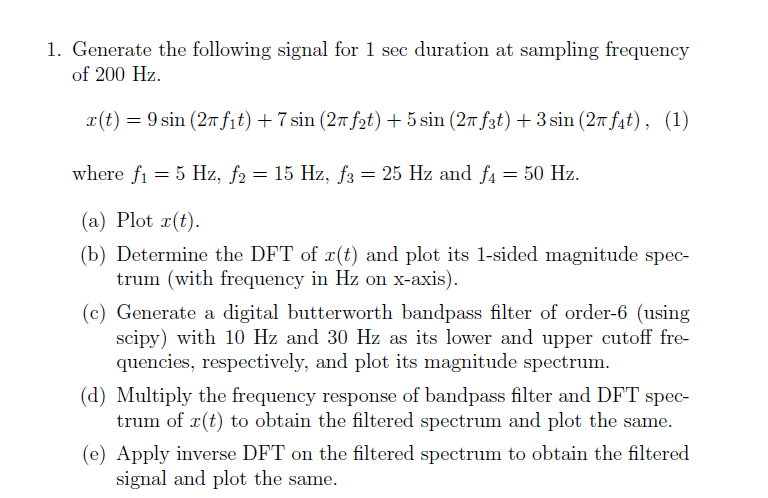

# a & b

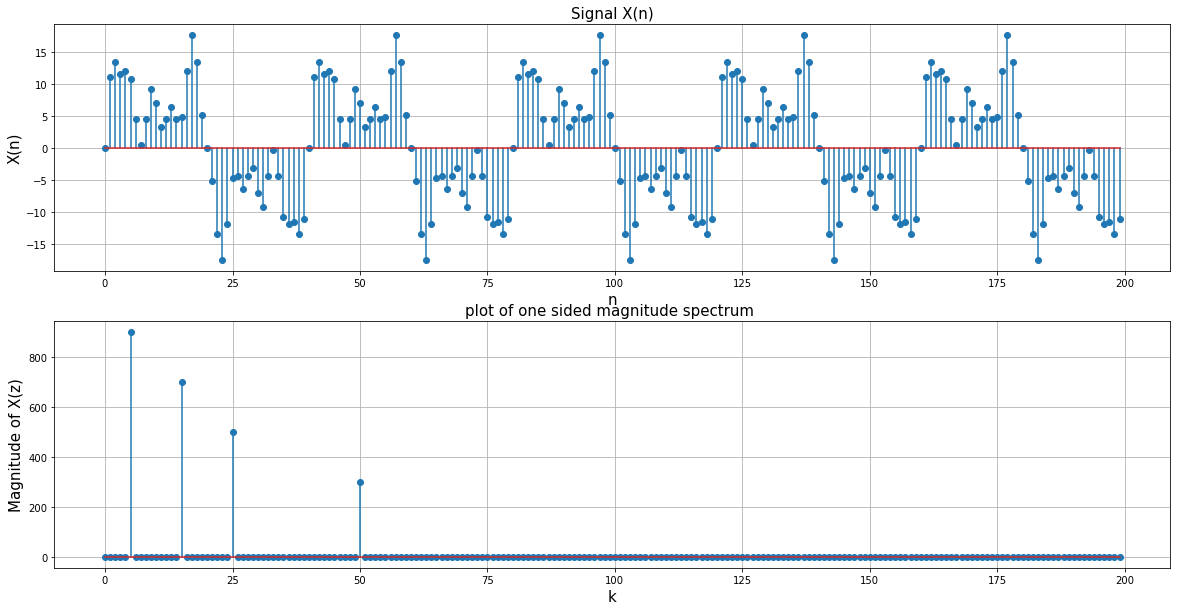

In [2]:
fs = 200
t = np.arange(0,1,1/fs)
n = np.arange(fs)
k = np.arange(fs)
N = len(n)

x = 9*np.sin(2*pi*5*n/N) + 7*np.sin(2*pi*15*n/N) + 5*np.sin(2*pi*25*n/N) + 3*np.sin(2*pi*50*n/N) 

def DFT(x,t):
    n = np.arange(len(t))
    k = np.arange(len(t))
    DFT = np.zeros(len(t),dtype = complex)
    for i in range(len(t)):
        DFT[i] = np.sum(x * np.exp(-2j*pi*k[i]*n/N))
    return DFT
y = DFT(x,t)

z = np.zeros(len(y))
for i in range(len(z)):
    if i < (len(z)/2):
        z[i] = abs(y[i])

fig,ax = plt.subplots(2,1, figsize = (20,10))
ax[0].stem(n,x)
ax[0].set_xlabel("n", size = 15)
ax[0].set_ylabel("X(n)", size = 15)
ax[0].set_title("Signal X(n)", size = 15)
ax[0].grid(which='both', axis='both')
ax[1].stem(k,z)
ax[1].set_xlabel("k", size = 15)
ax[1].set_ylabel("Magnitude of X(z)", size = 15)
ax[1].set_title("plot of one sided magnitude spectrum ", size = 15)
ax[1].grid(which='both', axis='both')

# c, d & e

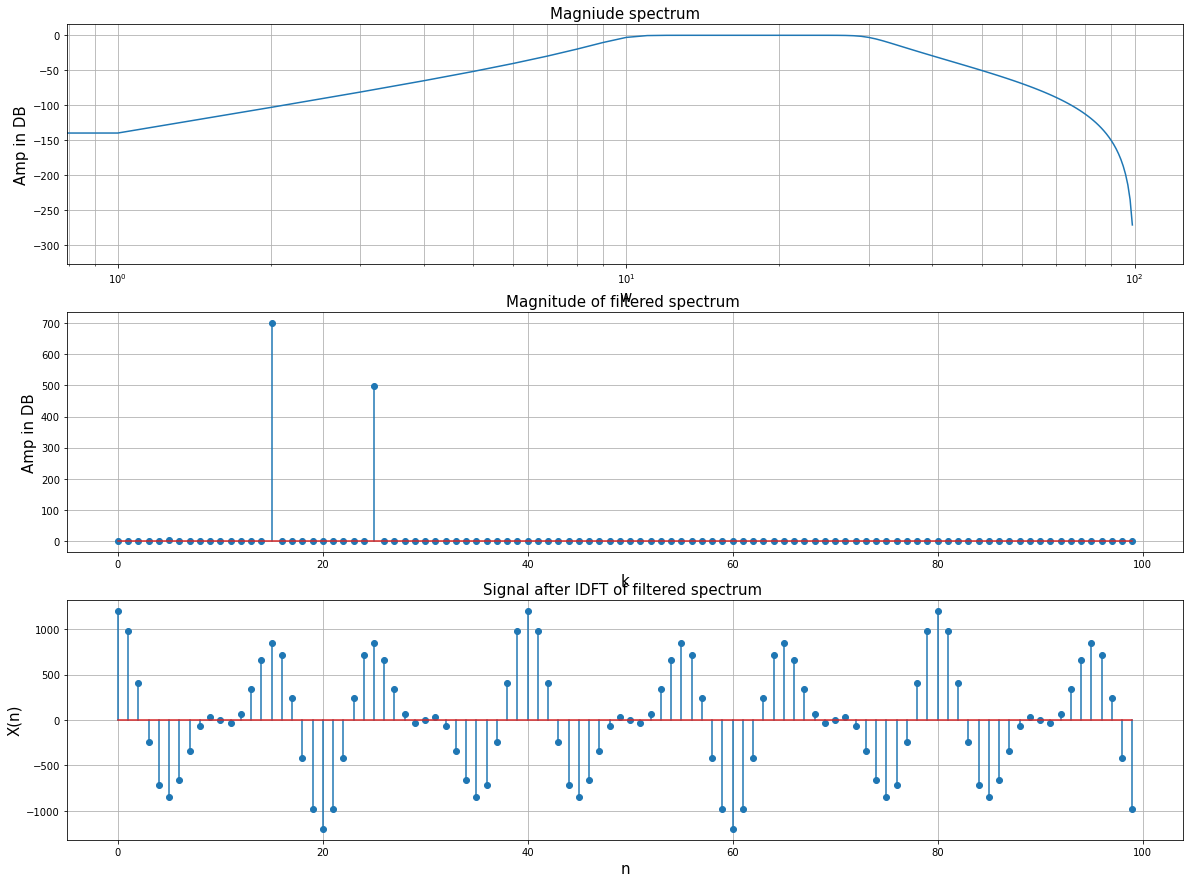

In [3]:
from scipy import signal
b,a = scipy.signal.butter(6,(10,30), btype= 'bandpass', analog=False, output='ba', fs=200,)

w, h = signal.freqz(b, a,worN = 100,fs=200)

s = abs((y[:100])*h)

def IDFT(s):
    n = np.arange(100)
    k = np.arange(100)
    IDFT = np.zeros(100,dtype = complex)
    for i in range(100):
        IDFT[i] = np.sum(s * np.exp(2j*pi*k[i]*n/N))
    return IDFT
x1 = IDFT(s)

fig,ax = plt.subplots(3,1, figsize = (20,15))
ax[0].semilogx(w, 20 * np.log10(abs(h)))
ax[0].set_xlabel("w", size = 15)
ax[0].set_ylabel("Amp in DB", size = 15)
ax[0].set_title("Magniude spectrum", size = 15)
ax[0].grid(which='both', axis='both')
ax[1].stem(s)
ax[1].set_xlabel("k", size = 15)
ax[1].set_ylabel("Amp in DB", size = 15)
ax[1].set_title("Magnitude of filtered spectrum ", size = 15)
ax[1].grid(which='both', axis='both')
ax[2].stem(x1)
ax[2].set_xlabel("n", size = 15)
ax[2].set_ylabel("X(n)", size = 15)
ax[2].set_title("Signal after IDFT of filtered spectrum ", size = 15)
ax[2].grid(which='both', axis='both')



# 2

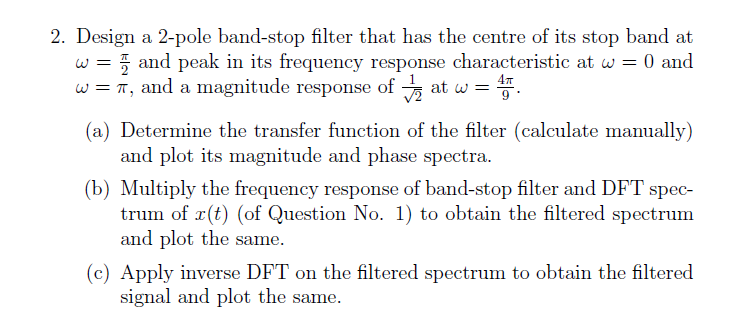

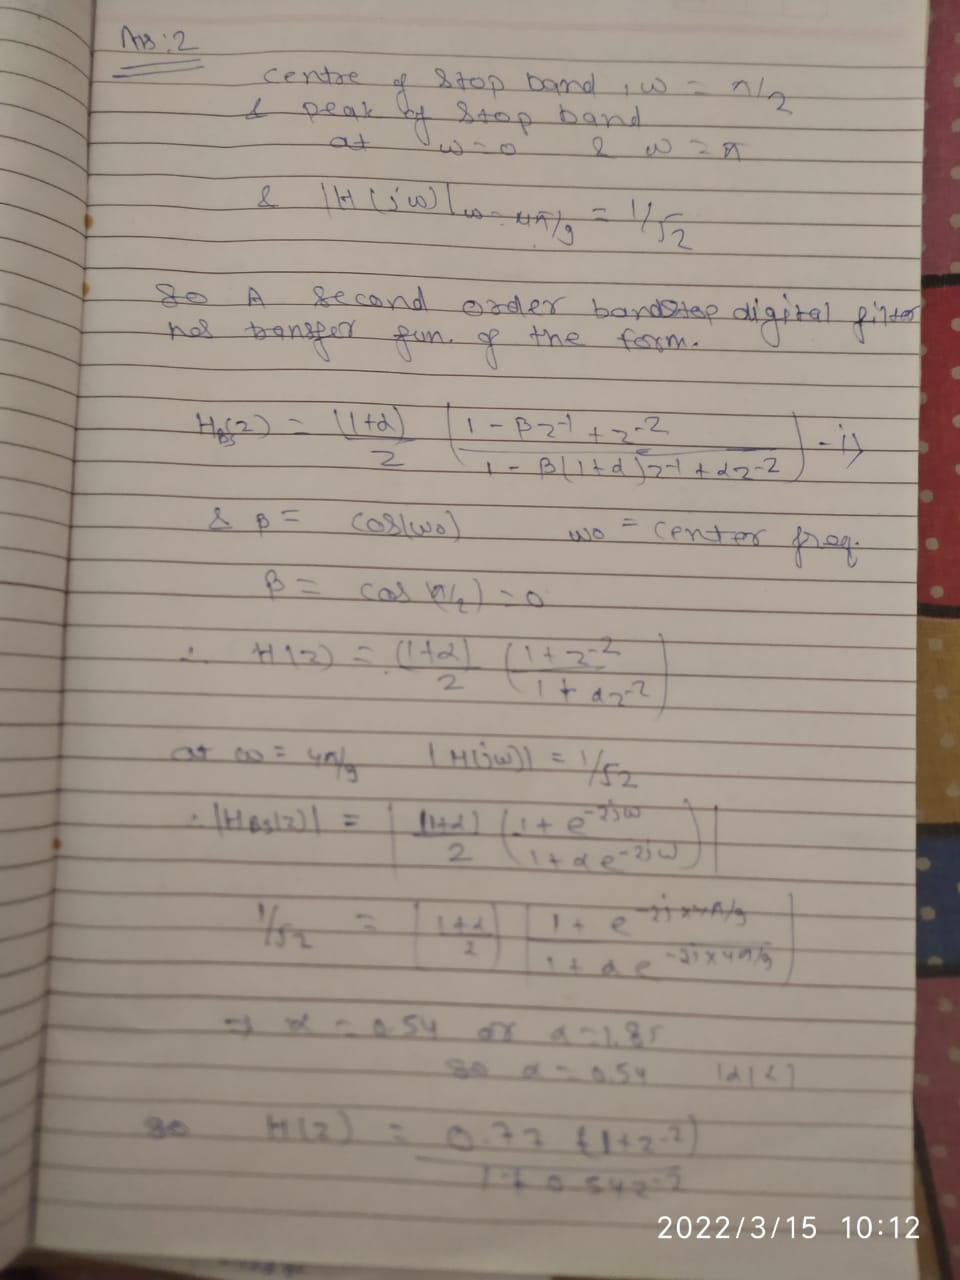

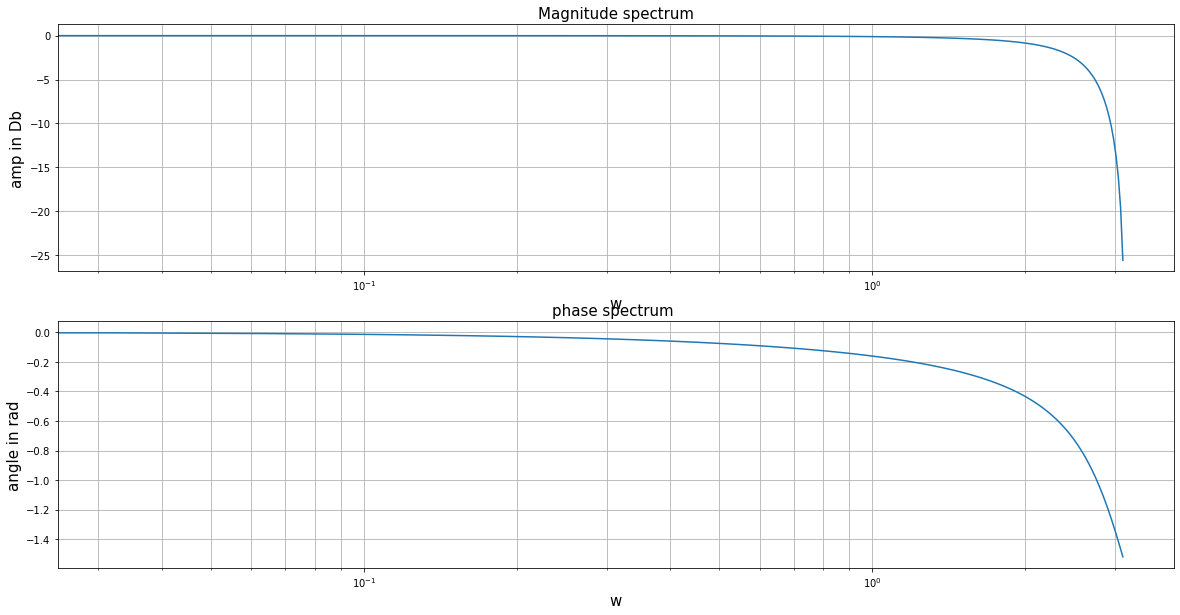

In [4]:
num = np.array([0.77,0.77]) 
den = np.array([1,0.54])

w, h = signal.freqz(num, den, worN = 100)

fig,ax = plt.subplots(2,1, figsize = (20,10))
ax[0].semilogx(w, 20 * np.log10(abs(h)))
ax[0].set_xlabel("w", size = 15)
ax[0].set_ylabel("amp in Db", size = 15)
ax[0].set_title("Magnitude spectrum", size = 15)
ax[0].grid(which='both', axis='both')
ax[1].semilogx(w, np.angle(h))
ax[1].set_xlabel("w", size = 15)
ax[1].set_ylabel("angle in rad", size = 15)
ax[1].set_title("phase spectrum ", size = 15)
ax[1].grid(which='both', axis='both')




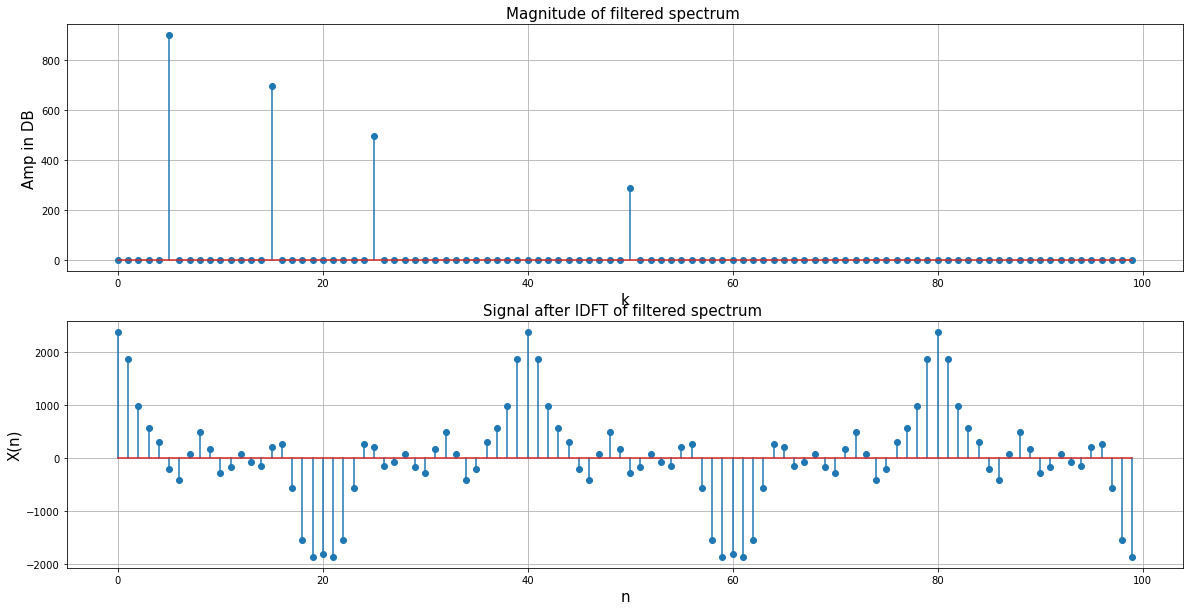

In [5]:
s = abs((y[:100])*h)
x1 = IDFT(s)

fig,ax = plt.subplots(2,1, figsize = (20,10))
ax[0].stem(s)
ax[0].set_xlabel("k", size = 15)
ax[0].set_ylabel("Amp in DB", size = 15)
ax[0].set_title("Magnitude of filtered spectrum ", size = 15)
ax[0].grid(which='both', axis='both')
ax[1].stem(x1)
ax[1].set_xlabel("n", size = 15)
ax[1].set_ylabel("X(n)", size = 15)
ax[1].set_title("Signal after IDFT of filtered spectrum ", size = 15)
ax[1].grid(which='both', axis='both')


# 3

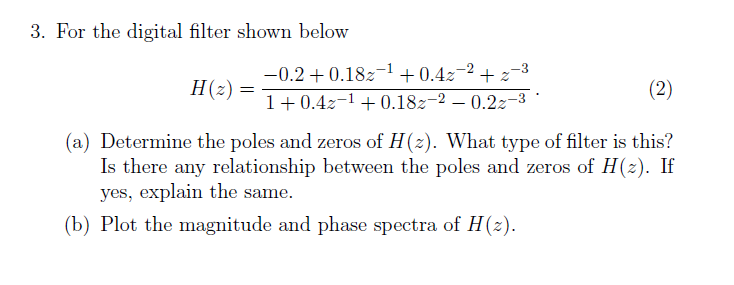

zeros are: 
 [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]
poles are: 
 [-0.92303383+0.86364912j -0.92303383-0.86364912j  0.72303383+0.85374444j
  0.72303383-0.85374444j]


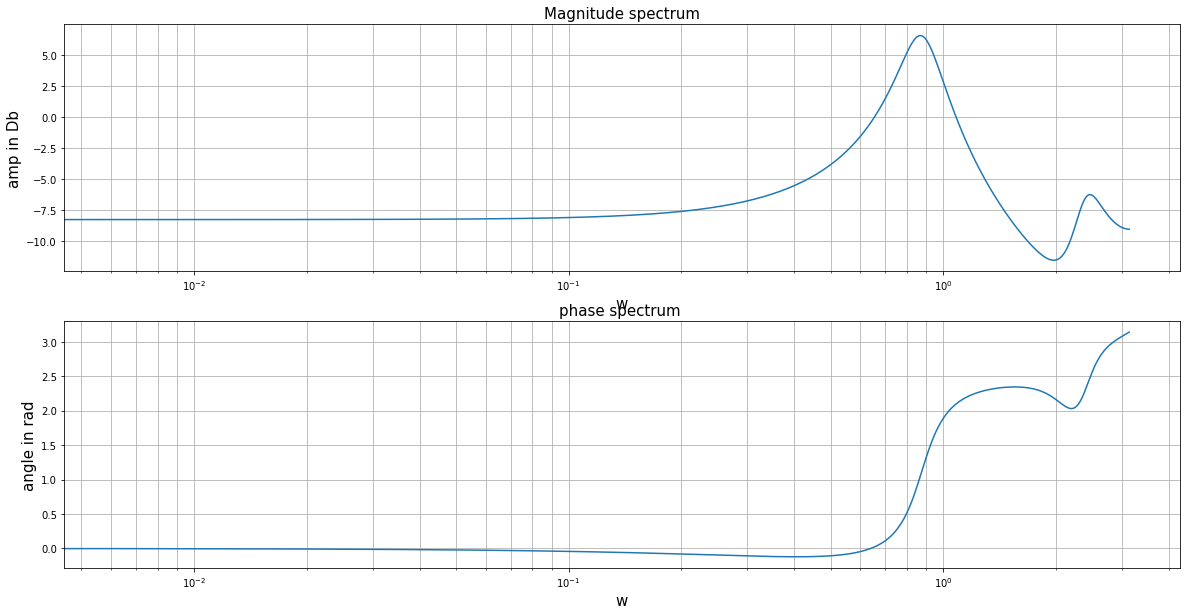

In [6]:
num = [-0.2,0.18,0.4,1]
den = [1,0.4, 0.18,-0,2]

zeros = np.roots(num)
poles = np.roots(den)
print(f'zeros are: \n {zeros}')
print(f'poles are: \n {poles}')
w,h = signal.freqz(num,den)

fig,ax = plt.subplots(2,1, figsize = (20,10))
ax[0].semilogx(w, 20 * np.log10(abs(h)))
ax[0].set_xlabel("w", size = 15)
ax[0].set_ylabel("amp in Db", size = 15)
ax[0].set_title("Magnitude spectrum", size = 15)
ax[0].grid(which='both', axis='both')
ax[1].semilogx(w, np.angle(h))
ax[1].set_xlabel("w", size = 15)
ax[1].set_ylabel("angle in rad", size = 15)
ax[1].set_title("phase spectrum ", size = 15)
ax[1].grid(which='both', axis='both')





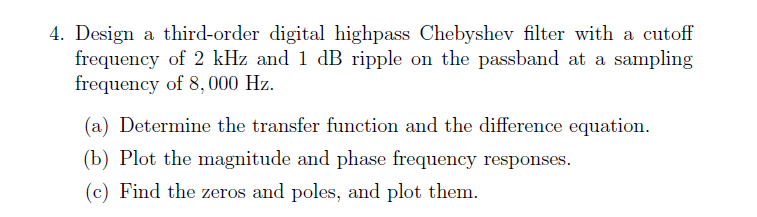

# 4

In [7]:
n,d = signal.cheby1(N=3,rp = 1,Wn = [2000], btype = 'highpass', output = 'ba', fs = 8000)
print(f'numerator side is {n} ')
print(f'denomenator side is {d} ')

numerator side is [ 0.13214071 -0.39642212  0.39642212 -0.13214071] 
denomenator side is [1.         0.34319322 0.60439354 0.20407467] 


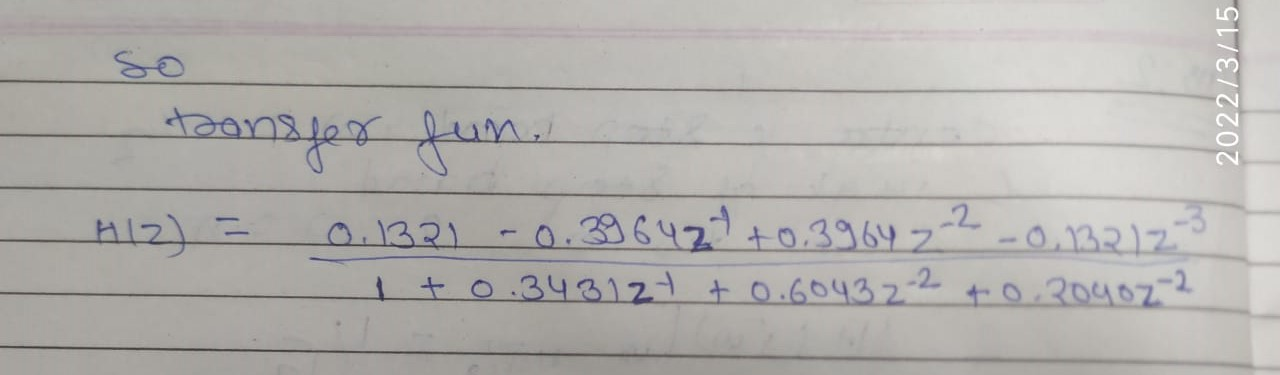

zeros are: 
 [1.00000657+0.00000000e+00j 0.99999671+5.69145455e-06j
 0.99999671-5.69145455e-06j]
poles are: 
 [-0.00232899+0.77640918j -0.00232899-0.77640918j -0.33853523+0.j        ]


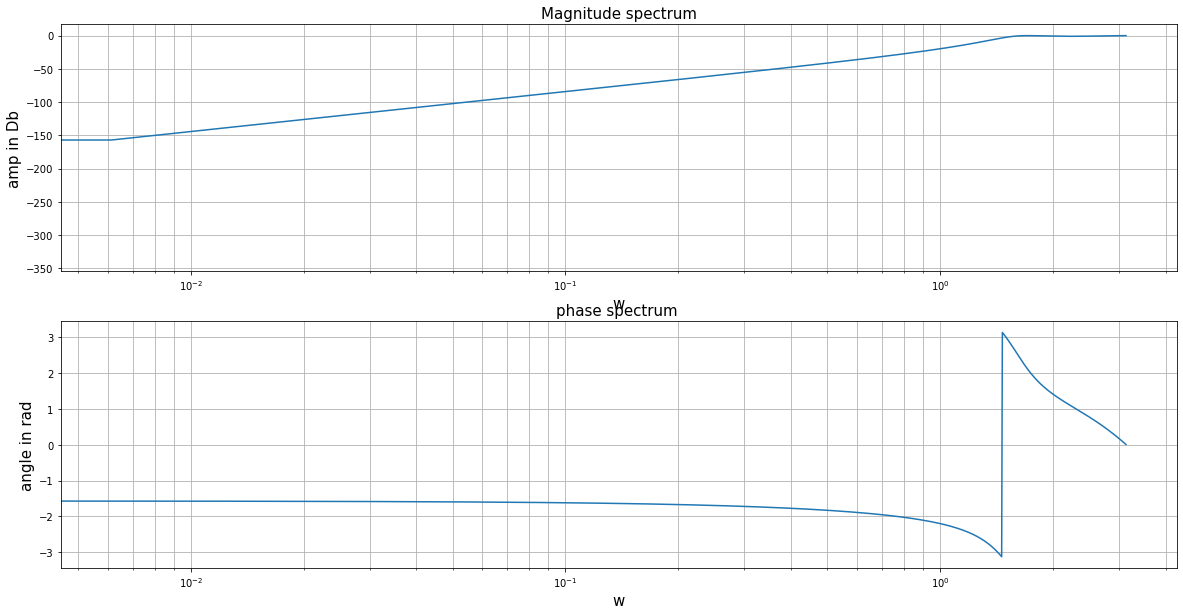

In [8]:
zeros = np.roots(n)
poles = np.roots(d)
print(f'zeros are: \n {zeros}')
print(f'poles are: \n {poles}')
w, h = signal.freqz(n,d)

fig,ax = plt.subplots(2,1, figsize = (20,10))
ax[0].semilogx(w, 20 * np.log10(abs(h)))
ax[0].set_xlabel("w", size = 15)
ax[0].set_ylabel("amp in Db", size = 15)
ax[0].set_title("Magnitude spectrum", size = 15)
ax[0].grid(which='both', axis='both')
ax[1].semilogx(w, np.angle(h))
ax[1].set_xlabel("w", size = 15)
ax[1].set_ylabel("angle in rad", size = 15)
ax[1].set_title("phase spectrum ", size = 15)
ax[1].grid(which='both', axis='both')


# 5

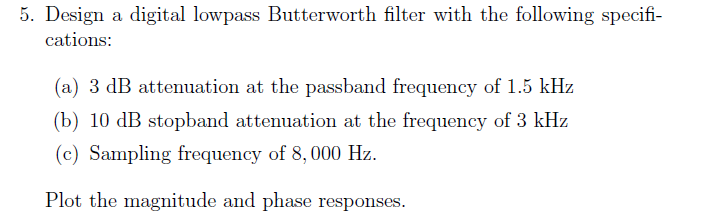

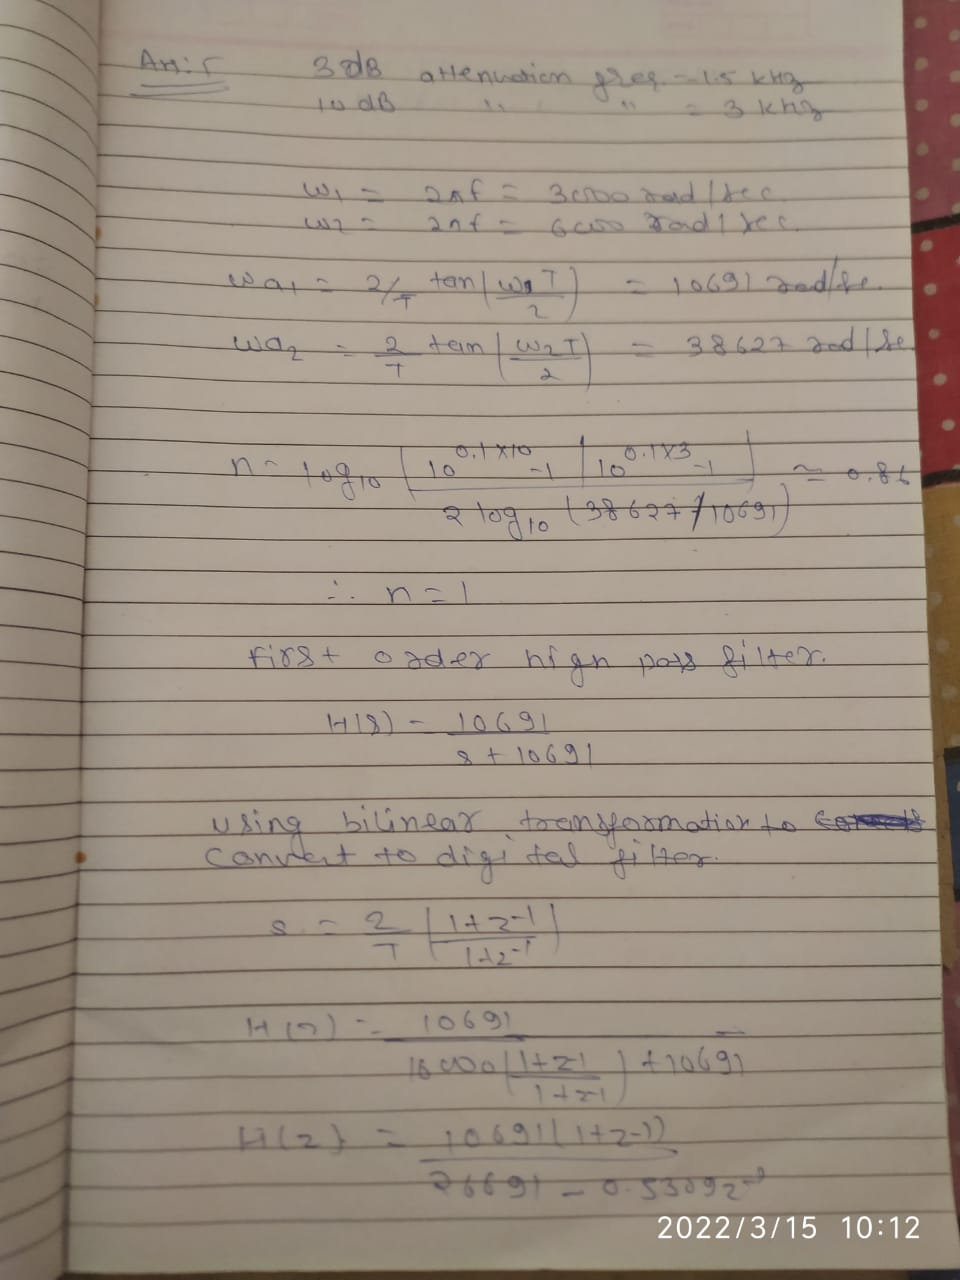

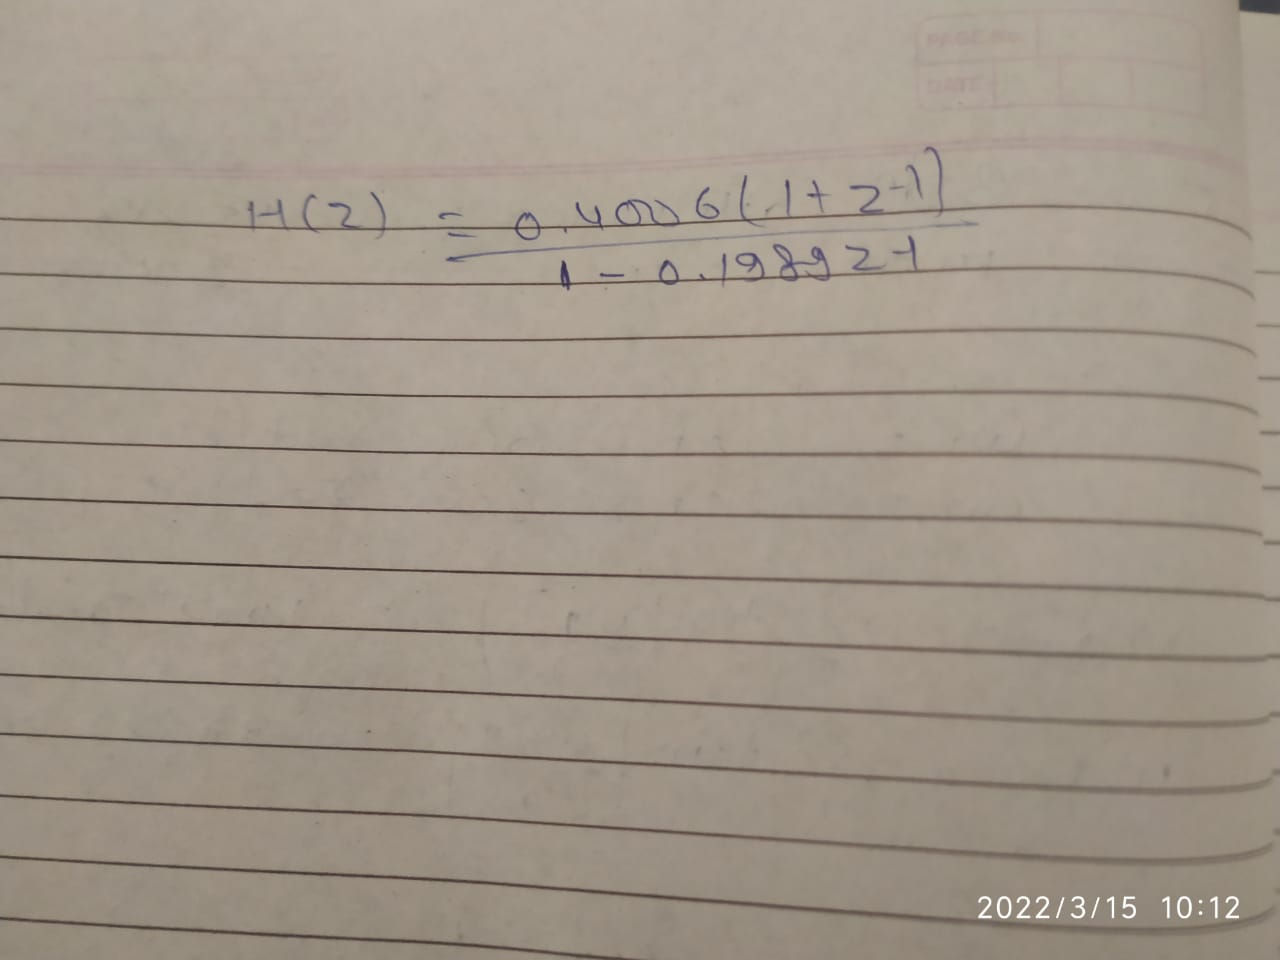

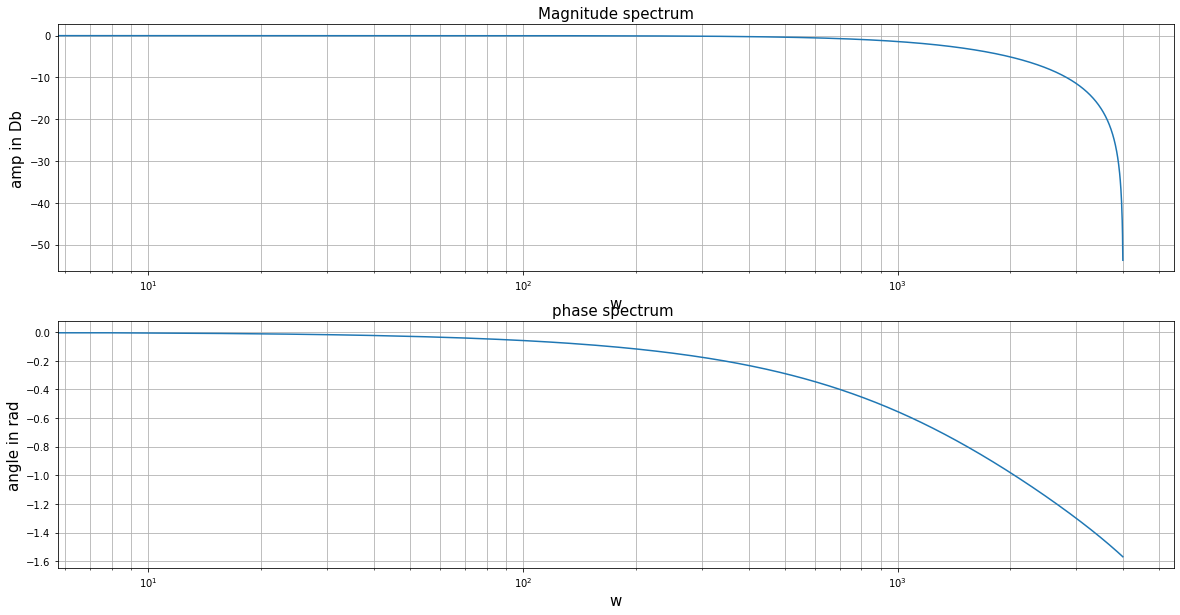

In [9]:
num = [0.4006, 0.4006 ]
den = [1, -0.1989]

w, h = signal.freqz(num, den, worN = 512, fs = 8000)

fig,ax = plt.subplots(2,1, figsize = (20,10))
ax[0].semilogx(w, 20 * np.log10(abs(h)))
ax[0].set_xlabel("w", size = 15)
ax[0].set_ylabel("amp in Db", size = 15)
ax[0].set_title("Magnitude spectrum", size = 15)
ax[0].grid(which='both', axis='both')
ax[1].semilogx(w, np.angle(h))
ax[1].set_xlabel("w", size = 15)
ax[1].set_ylabel("angle in rad", size = 15)
ax[1].set_title("phase spectrum ", size = 15)
ax[1].grid(which='both', axis='both')



# 6

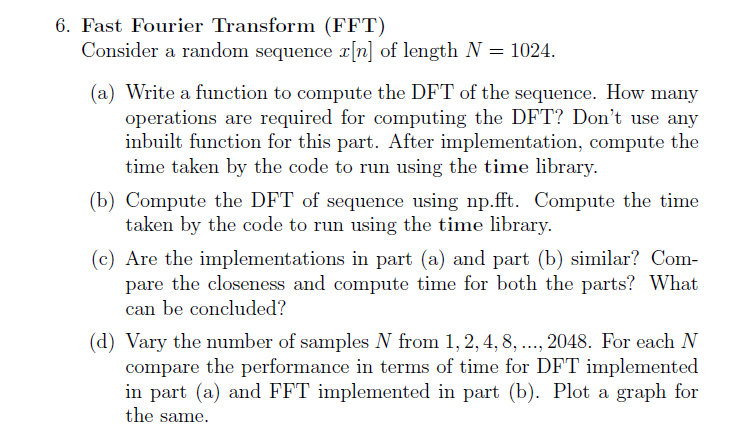

In [10]:
N = 1024
x = np.random.random(1024)

def DFT(x):
    N = len(x)
    n = np.arange(len(x))
    k = np.arange(len(x))
    DFT = np.zeros(len(x),dtype = complex)
    for i in range(len(x)):
        DFT[i] = np.sum(x * np.exp(-2j*pi*k[i]*n/N))
    return DFT


In [11]:
start_dft = time.time()
dft = DFT(x)
end_dft = time.time()
print(f'Time take by custom function to compute DFT is {end_dft - start_dft} seconds')

Time take by custom function to compute DFT is 0.058165788650512695 seconds


In [12]:
start_fft = time.time()
fft = np.fft.fft(x)
end_fft = time.time()

print(f'Time take by inbuilt function to compute DFT is {end_fft - start_fft} seconds')

Time take by inbuilt function to compute DFT is 0.0 seconds


In [13]:
N = np.power(2,range(0,12))

dft_array = np.zeros(12)
fft_array = np.zeros(12)

for i in range(12):
    seq = np.random.random(N[i])
    
    dft_strt = time.time()
    dft = DFT(seq)
    dft_end = time.time()
    
    
    fft_strt = time.time()
    fft = np.fft.fft(seq)
    fft_end = time.time()
    
    dft_array[i] = dft_end - dft_strt
    fft_array[i] = fft_end - fft_strt
    
    

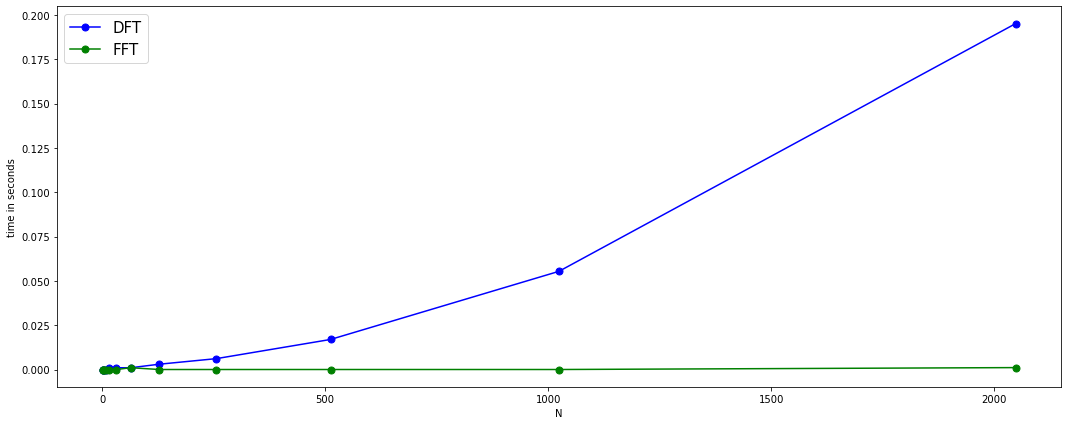

In [14]:
fig = plt.figure(figsize = (18,7))
fig.add_subplot(111)

plt.plot(N, dft_array, 'b', marker = 'o',markersize = 7,label='DFT')
plt.plot(N, fft_array, 'g', marker = 'o',markersize = 7,label='FFT')
plt.xlabel("N")
plt.ylabel("time in seconds")
plt.legend(prop = {'size':15})
plt.show()


# 7

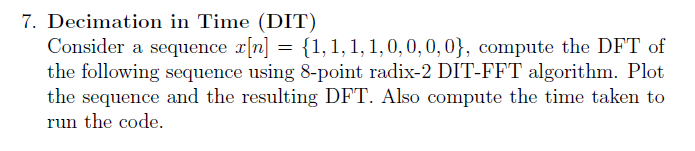

In [15]:
x = [1,1,1,1,0,0,0,0]
l = len(x)

DIT_strt = time.time()

x1 = np.zeros(l,dtype=np.complex64)
x2 = np.zeros(l,dtype=np.complex64)
x3 = np.zeros(l,dtype=np.complex64)

w = np.exp(-2j*np.pi/l)

# Splitting the given data as {(0,4),(2,6),(1,5),(3,7)} and computing 2 point DFT of each pair

# 2 point DFT between index 0 and 4
x1[0] = x[0] + x[4]
x1[1] = x[0] - x[4]

# 2 point DFT between index 2 and 6
x1[2] = x[2] + x[6]
x1[3] = x[2] - x[6]

# 2 point DFT between index 1 and 5
x1[4] = x[1] + x[5]
x1[5] = x[1] - x[5]

# 2 point DFT between index 3 and 7
x1[6] = x[3] + x[7]
x1[7] = x[3] - x[7]


# Combining 2 point DFT of even and odd sequences

# Even Sequences
x2[0] = x1[0] + (w**0)*x1[2]
x2[1] = x1[1] + (w**2)*x1[3]
x2[2] = x1[0] - (w**0)*x1[2]
x2[3] = x1[1] - (w**2)*x1[3]

# Odd sequence
x2[4] = x1[4] + (w**0)*x1[6]
x2[5] = x1[5] + (w**2)*x1[7]
x2[6] = x1[4] - (w**0)*x1[6]
x2[7] = x1[5] - (w**2)*x1[7]


# Combining 4 point DFTs 

x3[0] = x2[0] + (w**0)*x2[4]
x3[1] = x2[1] + (w**1)*x2[5]
x3[2] = x2[2] + (w**2)*x2[6]
x3[3] = x2[3] + (w**3)*x2[7]
x3[4] = x2[0] - (w**0)*x2[4]
x3[5] = x2[1] - (w**1)*x2[5]
x3[6] = x2[2] - (w**2)*x2[6]
x3[7] = x2[3] - (w**3)*x2[7]

DIT_end = time.time()


print('The FFT of the given signal using DIT is:\n')
for i in range(l):
    print(f"X[{i}] = {x3[i]}")
    
print(f'\nThe time taken to calculate DIT is:{DIT_end-DIT_strt}')

The FFT of the given signal using DIT is:

X[0] = (4+0j)
X[1] = (1-2.4142136573791504j)
X[2] = 0j
X[3] = (1-0.4142135679721832j)
X[4] = 0j
X[5] = (1+0.4142135679721832j)
X[6] = 0j
X[7] = (1+2.4142136573791504j)

The time taken to calculate DIT is:0.0009982585906982422


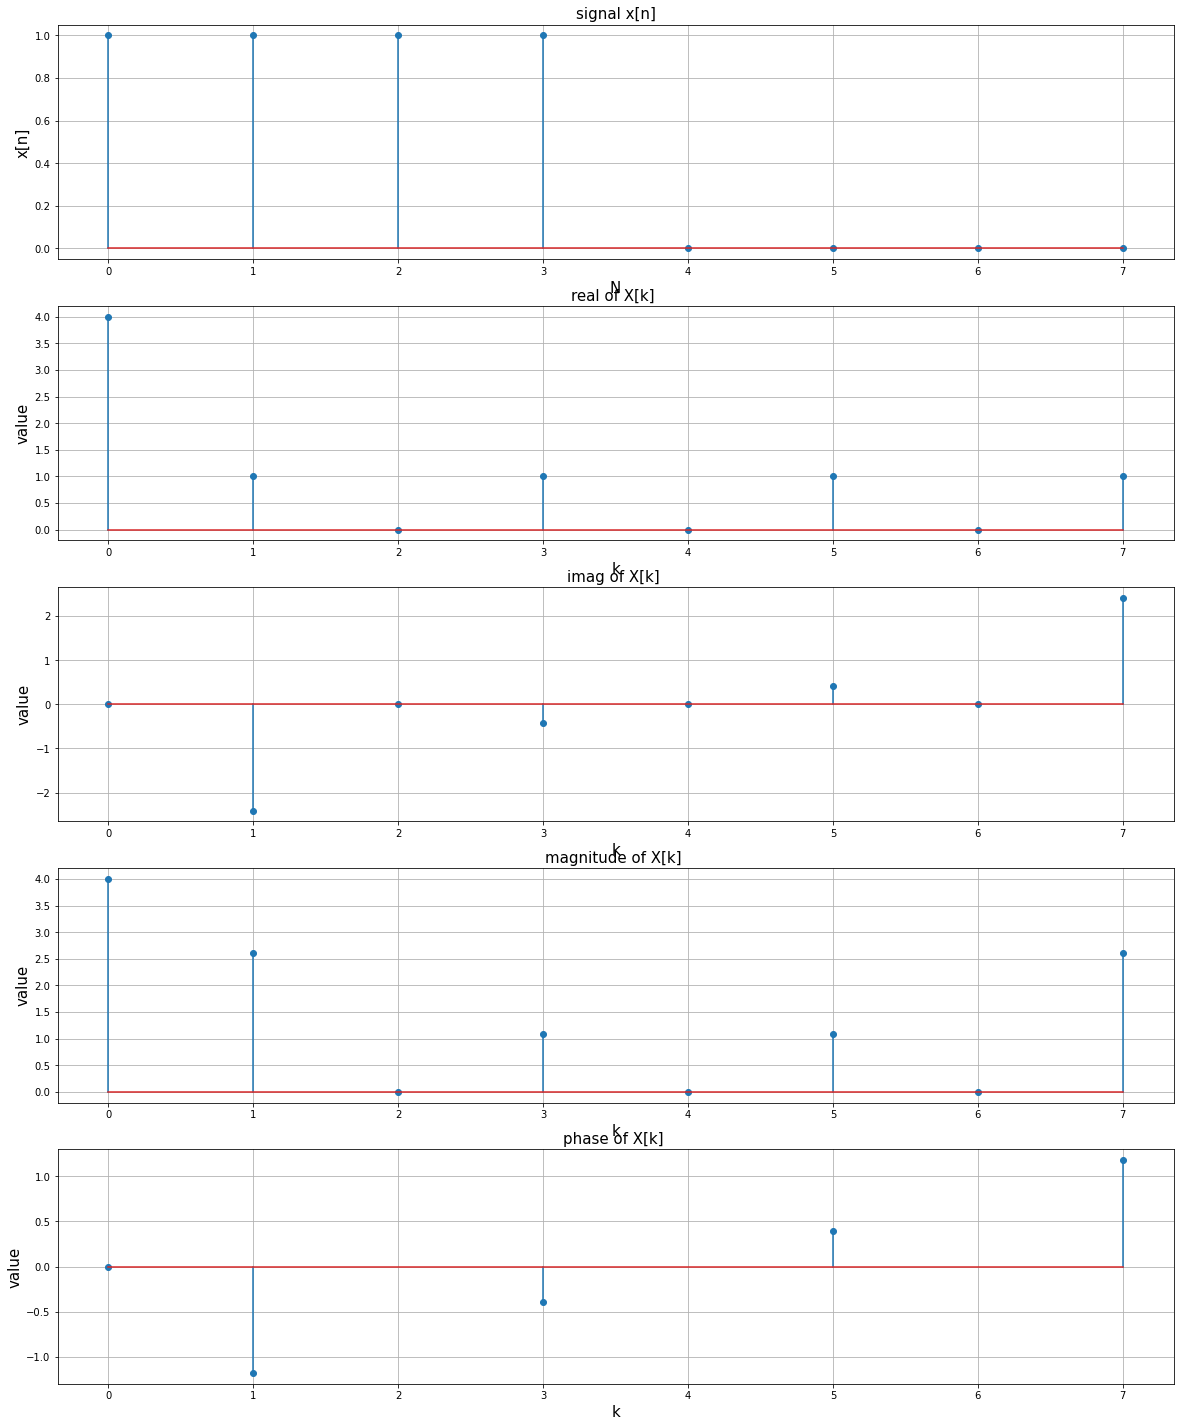

In [16]:
N = np.arange(l)

fig,ax = plt.subplots(5,1, figsize = (20,25))
ax[0].stem(N, x)
ax[0].set_xlabel("N", size = 15)
ax[0].set_ylabel("x[n]", size = 15)
ax[0].set_title("signal x[n]", size = 15)
ax[0].grid(which='both', axis='both')

ax[1].stem(N, x3.real)
ax[1].set_xlabel("k", size = 15)
ax[1].set_ylabel("value", size = 15)
ax[1].set_title("real of X[k] ", size = 15)
ax[1].grid(which='both', axis='both')

ax[2].stem(N, x3.imag)
ax[2].set_xlabel("k", size = 15)
ax[2].set_ylabel("value", size = 15)
ax[2].set_title("imag of X[k] ", size = 15)
ax[2].grid(which='both', axis='both')

ax[3].stem(N, abs(x3))
ax[3].set_xlabel("k", size = 15)
ax[3].set_ylabel("value", size = 15)
ax[3].set_title("magnitude of X[k] ", size = 15)
ax[3].grid(which='both', axis='both')

ax[4].stem(N, np.arctan(x3.imag/x3.real))
ax[4].set_xlabel("k", size = 15)
ax[4].set_ylabel("value", size = 15)
ax[4].set_title("phase of X[k] ", size = 15)
ax[4].grid(which='both', axis='both')



# 8

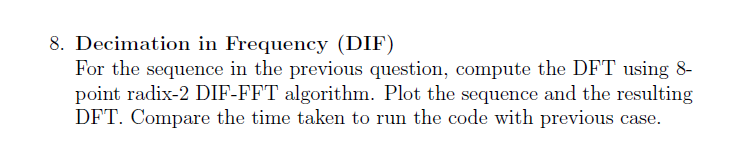

In [17]:
x = [1,1,1,1,0,0,0,0]
l = len(x)
DIF_strt = time.time()

x1 = np.zeros(len(x),dtype=np.complex64)
x2 = np.zeros(len(x),dtype=np.complex64)
x3 = np.zeros(len(x),dtype=np.complex64)

w = np.exp(-1j*2*np.pi/len(x))



x1[0] = x[0] + x[4]
x1[1] = x[1] + x[5]
x1[2] = x[2] + x[6]
x1[3] = x[3] + x[7]
x1[4] = (x[0] - x[4])*(w**0)
x1[5] = (x[1] - x[5])*(w**1)
x1[6] = (x[2] - x[6])*(w**2)
x1[7] = (x[3] - x[7])*(w**3)


# Combining 2 point DFT of even and odd sequences

# Even Sequences
x2[0] = x1[0] + x1[2]
x2[1] = x1[1] + x1[3]
x2[2] = (x1[0] - x1[2])*(w**0)
x2[3] = (x1[1] - x1[3])*(w**2)

# Odd sequence
x2[4] = x1[4] + x1[6]
x2[5] = x1[5] + x1[7]
x2[6] = (x1[4] - x1[6])*(w**0)
x2[7] = (x1[5] - x1[7])*(w**2)

# 2 point DFT between index 0 and 4
x3[0] = x2[0] + x2[1]
x3[1] = x2[0] - x2[1]

# 2 point DFT between index 2 and 6
x3[2] = x2[2] + x2[3]
x3[3] = x2[2] - x2[3]

# 2 point DFT between index 1 and 5
x3[4] = x2[4] + x2[5]
x3[5] = x2[4] - x2[5]

# 2 point DFT between index 3 and 7
x3[6] = x2[6] + x2[7]
x3[7] = x2[6] - x2[7]

DIF_end = time.time()

print('The FFT  using DIT is:\n')
for i in range(l):
    print(f"X[{i}] = {x3[i]}")
    
print(f'\nThe time taken to calculate DIT is:{DIF_end-DIF_strt}')

The FFT  using DIT is:

X[0] = (4+0j)
X[1] = 0j
X[2] = 0j
X[3] = 0j
X[4] = (1-2.4142136573791504j)
X[5] = (1+0.41421353816986084j)
X[6] = (1-0.41421353816986084j)
X[7] = (1+2.4142136573791504j)

The time taken to calculate DIT is:0.0


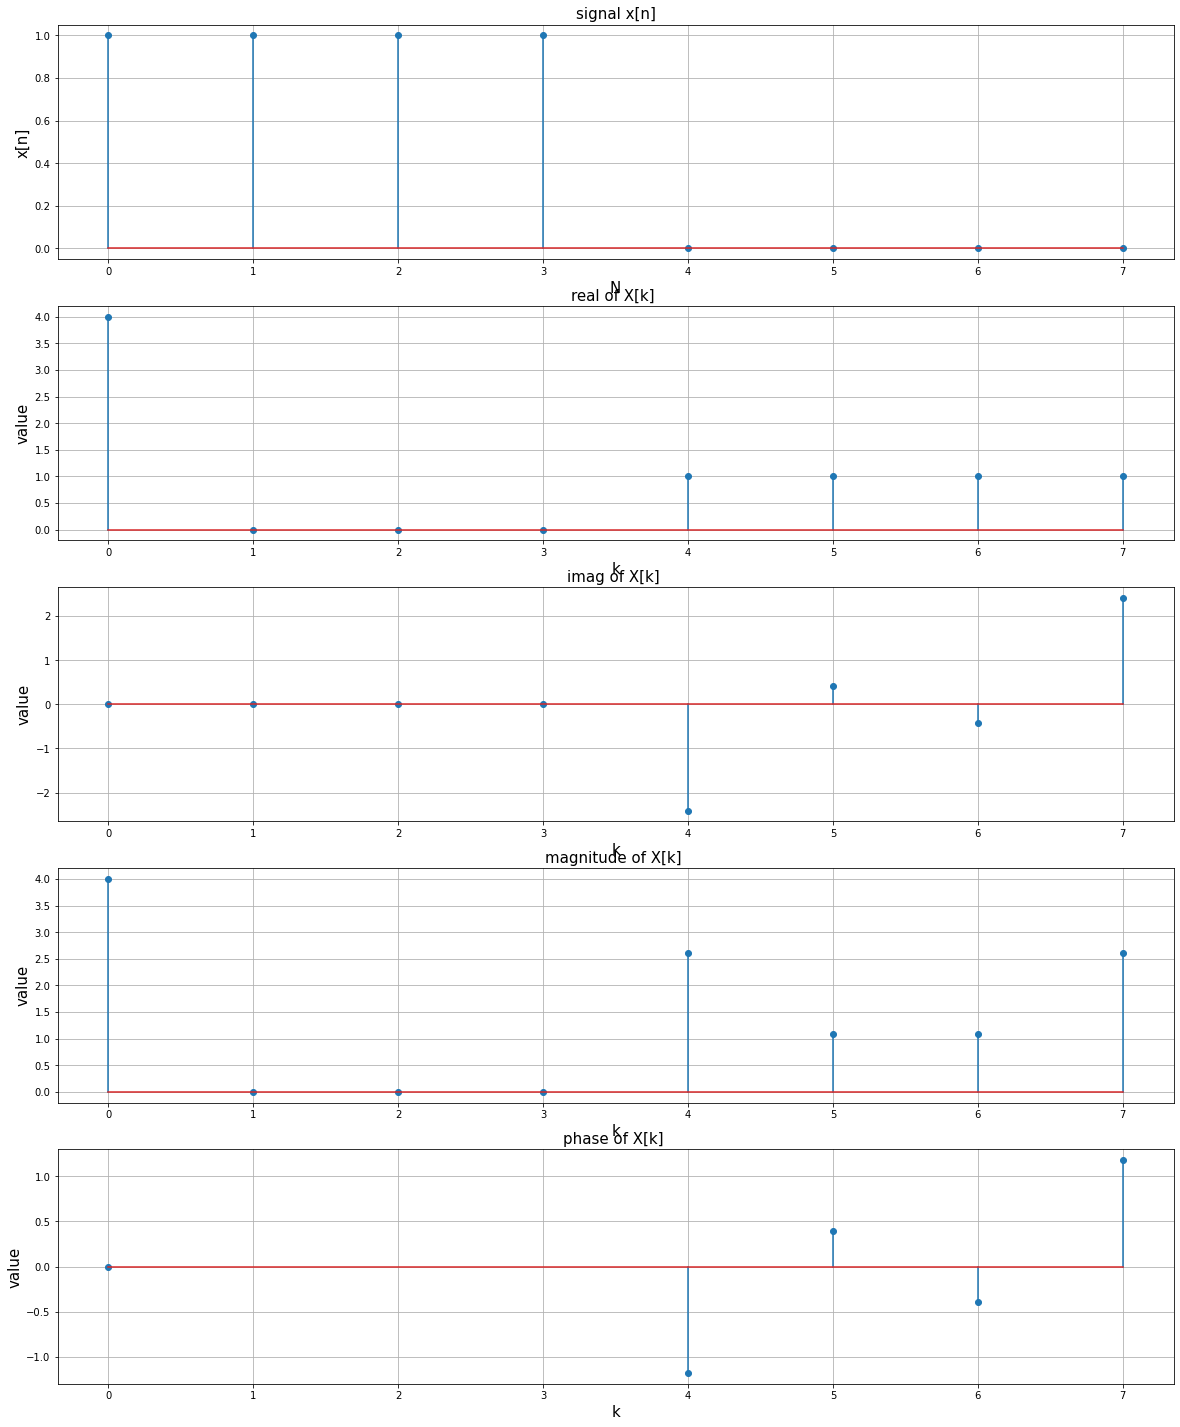

In [18]:
N = np.arange(l)

fig,ax = plt.subplots(5,1, figsize = (20,25))
ax[0].stem(N, x)
ax[0].set_xlabel("N", size = 15)
ax[0].set_ylabel("x[n]", size = 15)
ax[0].set_title("signal x[n]", size = 15)
ax[0].grid(which='both', axis='both')

ax[1].stem(N, x3.real)
ax[1].set_xlabel("k", size = 15)
ax[1].set_ylabel("value", size = 15)
ax[1].set_title("real of X[k] ", size = 15)
ax[1].grid(which='both', axis='both')

ax[2].stem(N, x3.imag)
ax[2].set_xlabel("k", size = 15)
ax[2].set_ylabel("value", size = 15)
ax[2].set_title("imag of X[k] ", size = 15)
ax[2].grid(which='both', axis='both')

ax[3].stem(N, abs(x3))
ax[3].set_xlabel("k", size = 15)
ax[3].set_ylabel("value", size = 15)
ax[3].set_title("magnitude of X[k] ", size = 15)
ax[3].grid(which='both', axis='both')

ax[4].stem(N, np.arctan(x3.imag/x3.real))
ax[4].set_xlabel("k", size = 15)
ax[4].set_ylabel("value", size = 15)
ax[4].set_title("phase of X[k] ", size = 15)
ax[4].grid(which='both', axis='both')

